# Project 3

### Excercise 1 - histogra,

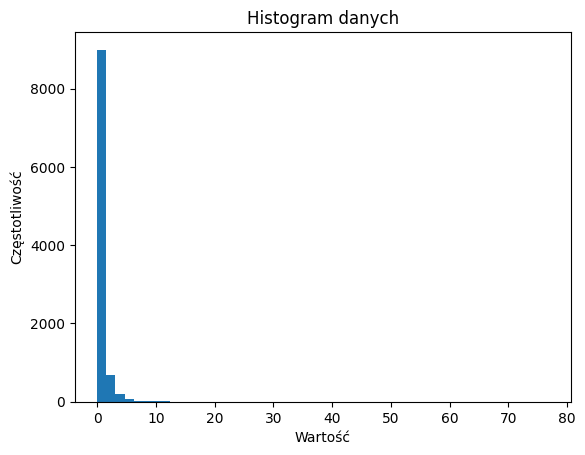

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.pareto(a=2.5, size=10000)  # rozkład potęgowy
plt.hist(data, bins=50)
plt.xlabel("Wartość")
plt.ylabel("Częstotliwość")
plt.title("Histogram danych")
plt.show()

Exercise 2 - log scale

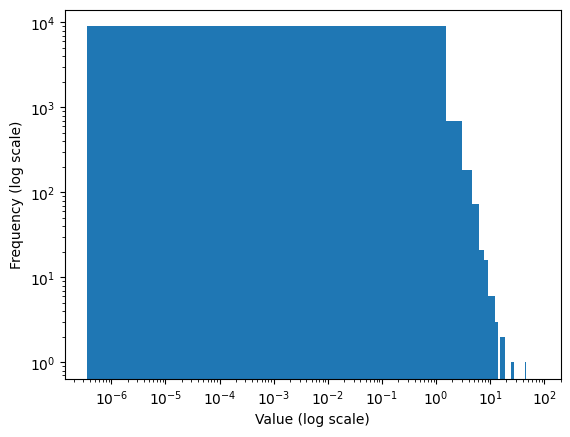

In [2]:
plt.hist(data, bins=50)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Value (log scale)")
plt.ylabel("Frequency (log scale)")
plt.show()


### Excercise 3 - log binning

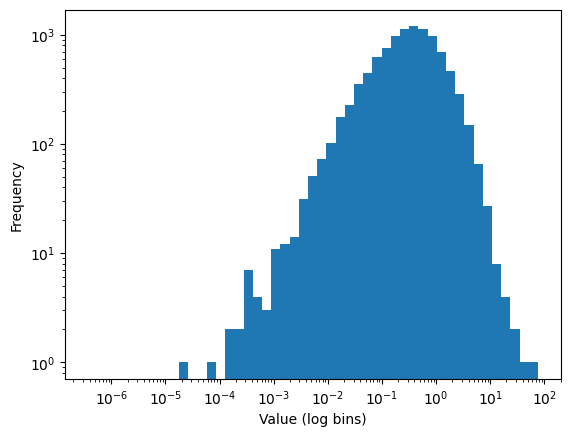

In [3]:
bins = np.logspace(np.log10(min(data)), np.log10(max(data)), 50)
plt.hist(data, bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Value (log bins)")
plt.ylabel("Frequency")
plt.show()

### Excercise 4 - survival function

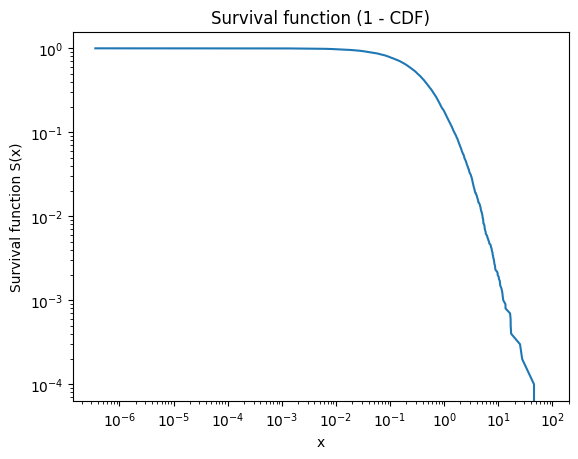

In [4]:
sorted_data = np.sort(data)
survival = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.loglog(sorted_data, survival)
plt.xlabel("x")
plt.ylabel("Survival function S(x)")
plt.title("Survival function (1 - CDF)")
plt.show()


### Analyse:

Linear histogram: easy to interpret, but unclear for data with a long tail.

Double-log plot: clearly shows power relationships.

Log-binning: better for a wide range of values — smooths data and reduces noise.

Survival function: most robust to noise and fluctuations, especially for rare data in the tail of the distribution.

### EXERCISE 6: log–log plot

Zadanie 6 — Alpha z regresji liniowej: 2.489


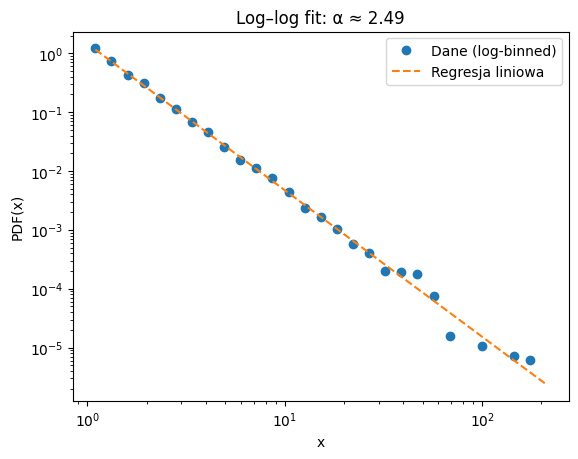

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- Dane przykładowe: rozkład Pareto ---
np.random.seed(42)
alpha_true = 2.5     # prawdziwa wartość alpha
xmin = 1.0
n = 5000

# Generujemy dane z rozkładu potęgowego (Pareto)
u = np.random.rand(n)
data = xmin * (1 - u) ** (-1 / (alpha_true - 1))

# Histogram z log-binningiem
bins = np.logspace(np.log10(xmin), np.log10(data.max()), 30)
counts, edges = np.histogram(data, bins=bins)
bin_centers = np.sqrt(edges[:-1] * edges[1:])
pdf = counts / (np.diff(edges) * len(data))   # normalizacja

# Regresja liniowa na log-log
mask = pdf > 0
slope, intercept, *_ = linregress(np.log10(bin_centers[mask]), np.log10(pdf[mask]))
alpha_reg = -slope  # nachylenie ~ -alpha

print(f"Zadanie 6 — Alpha z regresji liniowej: {alpha_reg:.3f}")

# Wykres
plt.loglog(bin_centers, pdf, 'o', label='Dane (log-binned)')
plt.loglog(bin_centers, 10**(intercept) * bin_centers**slope, '--', label='Regresja liniowa')
plt.xlabel("x")
plt.ylabel("PDF(x)")
plt.legend()
plt.title(f"Log–log fit: α ≈ {alpha_reg:.2f}")
plt.show()

### EXERCISE 7: MLE estimator for known xmin

In [7]:

# --------------------------------------------------------------------
# EXERCISE 7: Estymator MLE dla znanego xmin
# --------------------------------------------------------------------
def mle_alpha(x, xmin):
    x = x[x >= xmin]
    return 1 + len(x) / np.sum(np.log(x / xmin))

alpha_mle = mle_alpha(data, xmin)
print(f"Zadanie 7 — Alpha z MLE: {alpha_mle:.3f}")


Zadanie 7 — Alpha z MLE: 2.516


# EXERCISE 8: What if we don't know xmin?

When xmin is unknown:
- If we choose xmin too small, the result will be underestimated (because data outside the tail spoils the fit).
- If it is too large, the estimation will be less accurate (less data).
In practice, xmin is selected by minimizing the KS distance between the data and the model.

## Exercise P4.2 — Proof for uncorrelated network

For an **uncorrelated network**, the conditional probability that a randomly chosen edge from a vertex of degree $k$ points to a vertex of degree $k'$ is independent of $k$ and given by:

$$
P(k'|k) = \frac{k' P(k')}{\langle k \rangle}.
$$

This means that the probability is proportional to the number of edge ends at vertices of degree $k'$.

The average degree of the nearest neighbors of vertices with degree $k$ is defined as:

$$
\langle k_{nn}(k) \rangle = \sum_{k'} k' P(k'|k).
$$

Substituting the uncorrelated probability:

$$
\begin{aligned}
\langle k_{nn}(k) \rangle &= \sum_{k'} k' \frac{k' P(k')}{\langle k \rangle} \\
&= \frac{1}{\langle k \rangle} \sum_{k'} k'^2 P(k') \\
&= \frac{\langle k^2 \rangle}{\langle k \rangle}.
\end{aligned}
$$

Hence, for an uncorrelated network, $\langle k_{nn}(k) \rangle$ is a **constant** that does not depend on $k$:

$$
\boxed{ \langle k_{nn}(k) \rangle = \frac{\langle k^2 \rangle}{\langle k \rangle}. }
$$


## Exercise P4.3 — Dependence of nearest-neighbor degree on vertex degree

We can numerically compute $\langle k_{nn}(k) \rangle$ for a given network using NetworkX:


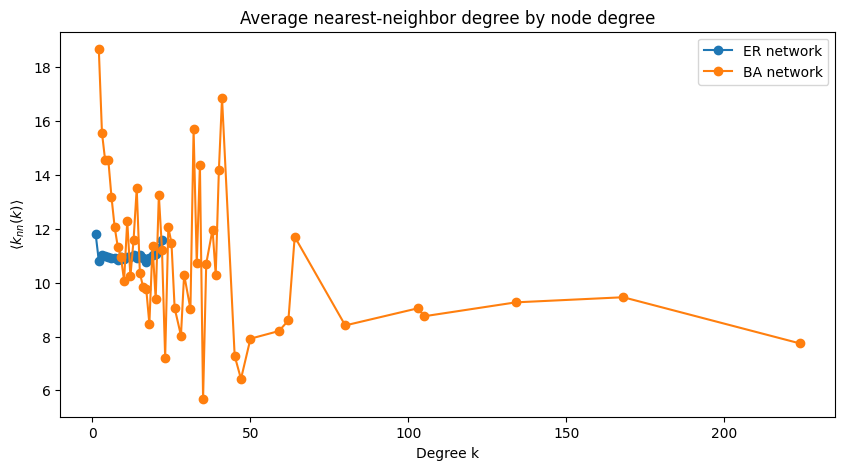

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def knn_by_degree(G):
    """Compute <k_nn>(k) averaged over all nodes of degree k."""
    knn_node = nx.average_neighbor_degree(G)
    deg = dict(G.degree())
    by_k = defaultdict(list)
    for node, k in deg.items():
        by_k[k].append(knn_node[node])
    ks = sorted(by_k.keys())
    knn_k = {k: np.mean(by_k[k]) for k in ks}
    return knn_k

def plot_knn(knn_k, label=None, loglog=False):
    ks = np.array(sorted(knn_k.keys()))
    vals = np.array([knn_k[k] for k in ks])
    plt.plot(ks, vals, 'o-', label=label)
    if loglog:
        plt.xscale('log'); plt.yscale('log')
    plt.xlabel('Degree k')
    plt.ylabel(r'$\langle k_{nn}(k) \rangle$')
    if label: plt.legend()

# Example networks
n = 5000
G_er = nx.erdos_renyi_graph(n, p=0.002, seed=1)       # uncorrelated (Erdős–Rényi)
G_ba = nx.barabasi_albert_graph(n, m=2, seed=2)       # scale-free (Barabási–Albert)

knn_er = knn_by_degree(G_er)
knn_ba = knn_by_degree(G_ba)

plt.figure(figsize=(10,5))
plot_knn(knn_er, label='ER network')
plot_knn(knn_ba, label='BA network')
plt.title('Average nearest-neighbor degree by node degree')
plt.show()

Interpretation:

For the Erdős–Rényi (ER) network, $\langle k_{nn}(k) \rangle$ is almost constant — the network is uncorrelated.

For the Barabási–Albert (BA) network, $\langle k_{nn}(k) \rangle$ decreases with $k$, showing disassortative mixing (high-degree nodes connect to low-degree ones).

# Exercise 4.4 - checking how randomizing (random edge switching) affects the average nearest-neighbor degree by node degree

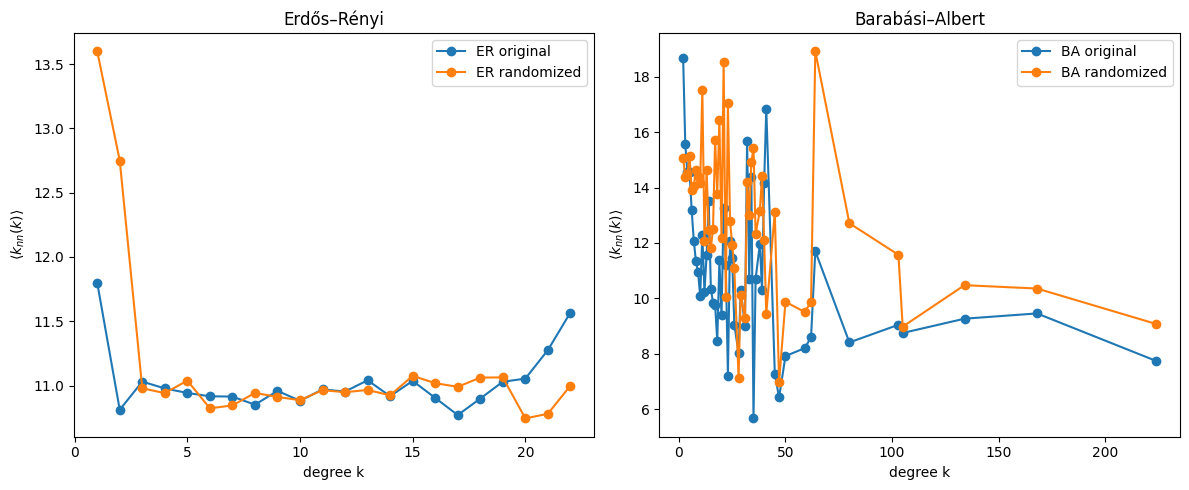

Teoretyczne <k^2>/<k> dla ER (orig): 10.94019706414639
Średnia <k_nn>(k) (średnia po wszystkich k) dla ER (orig): 11.023383459134385
Teoretyczne <k^2>/<k> dla BA (orig): 14.21968787515006
Średnia <k_nn>(k) (średnia po wszystkich k) dla BA (orig): 10.87143892063214


In [9]:
# wymagane: networkx, numpy, matplotlib
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def knn_by_degree(G):
    """
    Zwraca słownik: degree k -> average neighbor degree <k_nn>(k)
    computed as average over nodes of degree k of the average neighbor degree of that node.
    """
    # avg neighbor degree of each node (k_nn for each node)
    knn_node = nx.average_neighbor_degree(G)  # dict: node -> avg neighbor degree
    deg = dict(G.degree())
    by_k = defaultdict(list)
    for node, k in deg.items():
        by_k[k].append(knn_node[node])
    # compute mean for each degree
    ks = sorted(by_k.keys())
    knn_k = {k: np.mean(by_k[k]) for k in ks}
    counts = {k: len(by_k[k]) for k in ks}
    return knn_k, counts

def plot_knn(knn_k, counts=None, label=None, ax=None, loglog=False):
    if ax is None:
        fig, ax = plt.subplots()
    ks = np.array(sorted(knn_k.keys()))
    vals = np.array([knn_k[k] for k in ks])
    ax.plot(ks, vals, 'o-', label=label)
    if loglog:
        ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlabel('degree k'); ax.set_ylabel(r'$\langle k_{nn}(k)\rangle$')
    if label is not None:
        ax.legend()
    return ax

# --- Przyklad: ER i BA ---
n = 5000
# Erdos-Renyi (nie-skorrelowana sieć losowa)
p = 0.002     # srodkowy stopien ~ n*p
G_er = nx.erdos_renyi_graph(n, p, seed=1)
# Barabasi-Albert (skala, zwykle rozkład potegowy, moze miec korelacje)
m = 2
G_ba = nx.barabasi_albert_graph(n, m, seed=2)

# policz knn przed randomizacją
knn_er, cnt_er = knn_by_degree(G_er)
knn_ba, cnt_ba = knn_by_degree(G_ba)

# randomizacja zachowująca stopnie (double edge swap)
G_er_rand = G_er.copy()
nx.double_edge_swap(G_er_rand, nswap=10*G_er.number_of_edges(), max_tries=100*G_er.number_of_edges(), seed=3)

G_ba_rand = G_ba.copy()
nx.double_edge_swap(G_ba_rand, nswap=10*G_ba.number_of_edges(), max_tries=100*G_ba.number_of_edges(), seed=4)

# policz po randomizacji
knn_er_rand, _ = knn_by_degree(G_er_rand)
knn_ba_rand, _ = knn_by_degree(G_ba_rand)

# --- Wykresy ---
fig, axes = plt.subplots(1,2, figsize=(12,5))
plot_knn(knn_er, label='ER original', ax=axes[0], loglog=False)
plot_knn(knn_er_rand, label='ER randomized', ax=axes[0], loglog=False)
axes[0].set_title('Erdős–Rényi')

plot_knn(knn_ba, label='BA original', ax=axes[1], loglog=False)
plot_knn(knn_ba_rand, label='BA randomized', ax=axes[1], loglog=False)
axes[1].set_title('Barabási–Albert')

plt.tight_layout()
plt.show()

# --- Dodatkowe: porównanie z teoretycznym stałym dla sieci nieskorelowanych ---
def theoretical_knn_constant(G):
    degs = np.array([d for n,d in G.degree()])
    k1 = degs.mean()
    k2 = (degs**2).mean()
    return k2 / k1

print("Teoretyczne <k^2>/<k> dla ER (orig):", theoretical_knn_constant(G_er))
print("Średnia <k_nn>(k) (średnia po wszystkich k) dla ER (orig):",
      np.mean(list(knn_er.values())))
print("Teoretyczne <k^2>/<k> dla BA (orig):", theoretical_knn_constant(G_ba))
print("Średnia <k_nn>(k) (średnia po wszystkich k) dla BA (orig):",
      np.mean(list(knn_ba.values())))
